## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Hide warning messages
import warnings
warnings.filterwarnings('ignore')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_combined = pd.merge(study_results, mouse_data, how="left", on="Mouse ID")

# Display the data table for preview
data_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
count_mice = len(data_combined["Mouse ID"].unique())
count_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = data_combined.loc[data_combined.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data = data_combined.loc[data_combined["Mouse ID"]=="g989"]
duplicated_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data_combined[data_combined["Mouse ID"].isin(dup_mice)==False]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_data["Mouse ID"].unique()
len(clean_mice_count)

# len counts how many

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

tumor_mean = clean_data.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
tumor_mean

tumor_median = clean_data.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
tumor_median

tumor_variance = clean_data.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
tumor_variance

tumor_std = clean_data.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
tumor_std

tumor_SEM = clean_data.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
tumor_SEM

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_table = pd.DataFrame({"Mean":tumor_mean,
                              "Median": tumor_median,
                              "Variance": tumor_variance,
                              "Standard Deviation": tumor_std,
                              "SEM": tumor_SEM})
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
summary2 = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

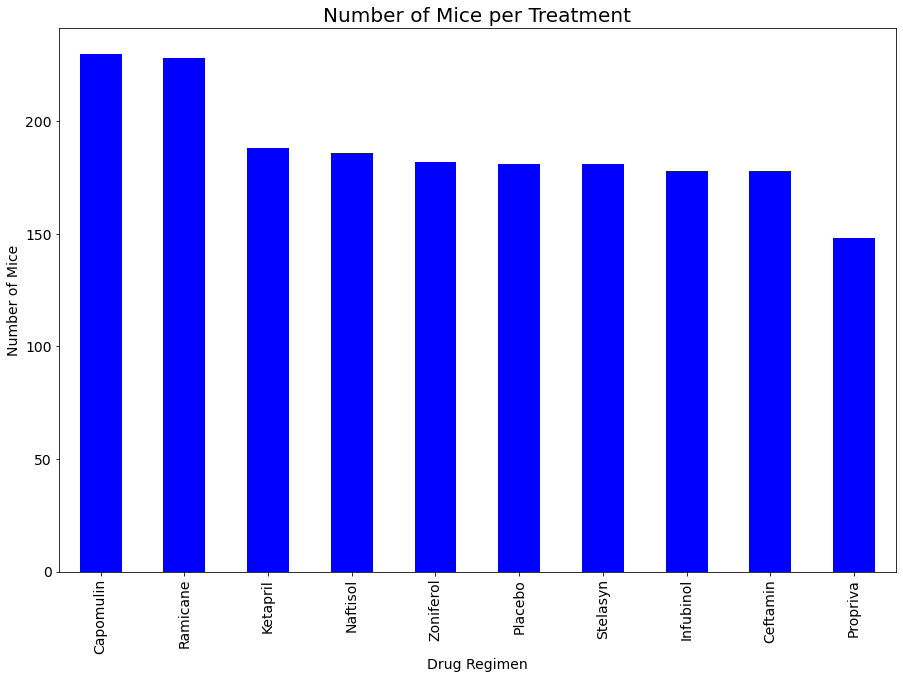

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

count_mice = clean_data["Drug Regimen"].value_counts()
count_mice

# value_counts: counts indivdual data points

pandas_plot = count_mice.plot.bar(figsize=(15,10), color='blue', fontsize = 14)
count_mice

plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Number of Mice", fontsize=14)
plt.title("Number of Mice per Treatment", fontsize=20)

plt.show()

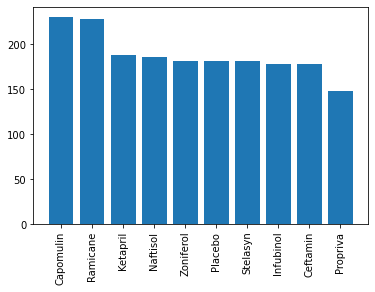

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.bar(count_mice.index.values, count_mice.values)

plt.xticks(rotation=90)
plt.show()

In [28]:
gender = mouse_data.groupby("Sex").count()

gender

,Mouse ID,Drug Regimen,Age_months,Weight (g)
Sex,,,,
Female,124,124,124,124
Male,125,125,125,125


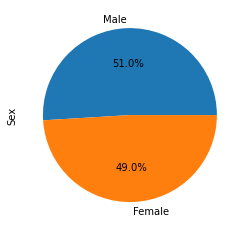

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_mice = clean_data["Sex"].value_counts()
gender_mice.plot(kind='pie', autopct='%1.1f%%')

plt.show()

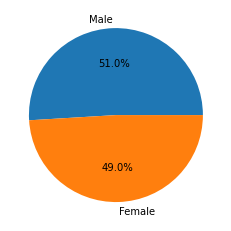

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_mice.values, labels=gender_mice.index.values, autopct='%1.1f%%')
plt.show()

# pie plots you need to use labels


## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

tumor_max = clean_data.groupby("Mouse ID").max()["Timepoint"]
tumor_max = tumor_max.reset_index()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data = tumor_max.merge(clean_data, on=["Mouse ID", "Timepoint"], how="left")
merge_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [27]:
# Put treatments into a list for for loop (and later for plot labels)

treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

tumor = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatment:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merge_data.loc[merege_data["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


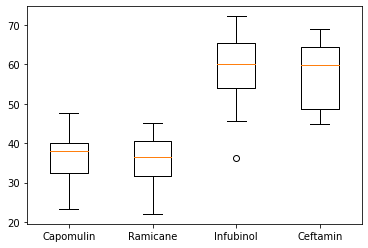

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor, labels=treatment)

plt.show()

## Line and Scatter Plots

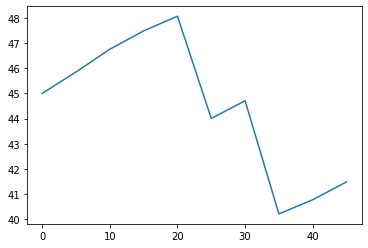

In [29]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin = clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"]
mouse_id = Capomulin.loc[Capomulin["Mouse ID"]=="l509"]

plt.plot(mouse_id["Timepoint"], mouse_id["Tumor Volume (mm3)"])
plt.show()

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# groupby and use mean

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Day 3 activite x,y weight and tumor column